In [1]:
import cobra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

In [2]:
model = cobra.io.read_sbml_model('../assets/iJO1366.xml')
gene_set = pd.read_csv('../assets/EC_1.X.1.X.Unique_NAD(P)_Coupled.GeneSet.Thermo.csv')

In [4]:
from cobra.sampling import sample


In [10]:


s2 = sample(model,1000,method='achr')
s2.head()

,EX_cm_e,EX_cmp_e,EX_co2_e,EX_cobalt2_e,DM_4crsol_c,DM_5drib_c,DM_aacald_c,DM_amob_c,DM_mththf_c,EX_colipa_e,...,UREAtex,RNDR2b,UREAtpp,RNDR3,RNDR3b,RNDR4,RNDR4b,RNTR1c2,RNTR2c2,RNTR3c2
0,0.0,0.0,53.612064,-5.617429e-11,5.190706e-10,1.379198e-07,8.682255e-15,4.655342e-12,0.000002,0.000001,...,-0.000056,0.000003,-0.000056,0.000001,1.058350e-06,0.000004,0.000001,0.000027,0.000029,0.000006
1,0.0,0.0,53.571777,-5.107710e-11,4.652032e-10,1.378510e-07,8.680239e-15,4.172226e-12,0.000002,0.000001,...,-0.000088,0.000003,-0.000088,0.000001,1.058283e-06,0.000004,0.000001,0.000009,0.000029,0.000006
2,0.0,0.0,56.387756,-2.545799e-09,2.339595e-08,1.483854e-07,9.764437e-15,2.098291e-10,0.008892,0.000001,...,-0.005921,0.000003,-0.005921,0.000001,9.576900e-07,1.497398,0.000001,0.000298,0.021882,0.000008
3,0.0,0.0,56.208347,-2.891694e-09,2.660967e-08,1.619423e-07,1.051779e-14,2.386518e-10,0.008892,0.000001,...,-0.005922,0.000003,-0.005922,0.000001,1.036482e-06,1.497461,0.000001,0.019098,0.021978,0.012055
4,0.0,0.0,56.186537,-2.888749e-09,2.658259e-08,1.515602e-07,1.069458e-14,2.384089e-10,0.008635,0.000004,...,-0.011359,0.000003,-0.011359,0.000001,9.567178e-07,1.497066,0.000001,0.019396,0.022983,0.038100


In [36]:
def compute_pn(s2):
    eplsion = 1e-2
    df = {'rn': [], 'type':[], 'val': []}
    for flux in list(s2):
        g = sum(s2[flux] < -eplsion)
        g2 = sum(s2[flux] > eplsion)
        df['rn'].append(flux)
        df['type'].append('negative')
        df['val'].append(g)

        df['rn'].append(flux)
        df['type'].append('positive')
        df['val'].append(g2)
    
    df = pd.DataFrame(df)
    return df

In [29]:
dfp = df.pivot_table(index='rn',columns = ['type'],values='val')

In [34]:

len(dfp[(dfp['negative'] > 0) & (dfp['positive'] > 0)])

60

In [39]:
sample_sizes = [10,50,100,500,1000,5000,10000]
res = {'N': [], 'flips': []}
for N in sample_sizes:
    S = sample(model,N,method='achr')
    dg = compute_pn(S)
    dgp = dg.pivot_table(index='rn',columns = ['type'],values='val')
    q = len(dgp[(dgp['negative'] > 0) & (dgp['positive'] > 0)])
    res['N'].append(N)
    res['flips'].append(q)

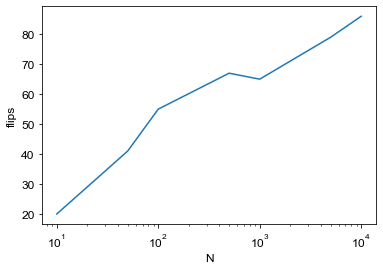

In [45]:
sns.lineplot(x='N',y='flips',data=pd.DataFrame(res))
plt.xscale('log')

In [42]:
import seaborn as sns

In [44]:
import matplotlib.pyplot as plt